## Problem Statement

Why are our best and most experienced employees leaving prematurely? Use this database and try to predict which valuable employees will leave next. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary

We have given you two datasets , hr_train.csv and hr_test.csv . You need to use data hr_train.csv to build predictive model for response variable ‘left’. hr_test.csv data contains all other factors except “left”, you need to predict that using the model that you developed and submit your predicted values in a csv files.

You have to submit the probability scores, not the hard classes.

If you are using decision trees or random forest here, probability scores can be calculated as:

score=model.predict_proba(X_train)[:,1]

score=model.predict_proba(X_test)[:,1]

#### In solving this problem statement my notebook follow the below strategy


<table style="width:100%; text-align: center;">
    <tr>
        <th style="text-align: center;">Sr. No</th>
        <th style="text-align: center;">Strategies</th>
    </tr>
    <tr>
        <td style="text-align: center;">1</td>
        <td style="text-align: center;">Import Libraries</td>
    </tr>
    <tr>
        <td style="text-align: center;">2</td>
        <td style="text-align: center;">Load Data</td>
    </tr>
    <tr>
        <td style="text-align: center;">3</td>
        <td style="text-align: center;">Data Dictionary</td>
    </tr>
    <tr>
        <td style="text-align: center;">4</td>
        <td style="text-align: center;">Descriptive Statistics</td>
    </tr>
    <tr>
        <td style="text-align: center;">5</td>
        <td style="text-align: center;">Univariate Analysis</td>
    </tr>
    <tr>
        <td style="text-align: center;">6</td>
        <td style="text-align: center;">Bivariate Analysis</td>
    </tr>
    <tr>
        <td style="text-align: center;">7</td>
        <td style="text-align: center;">Statistical Modeling (Decision tree and logistic regression)</td>
    </tr>
</table>


## 1. Import Libaries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

## 2. Load Data

In [12]:
import pandas as pd

df = pd.read_csv(r'C:\proj file\hr_train.csv', encoding='unicode_escape')

In [7]:
df.shape

(10499, 10)

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


## 3. Data Dictionary

In [14]:

df_dd = pd.DataFrame(df.dtypes,columns=['Numpy Dtype']) #Identify the Data Types - Numpy

df_dd['Nunique'] = df.nunique() #Identify the unique values

df_dd['MissingValues']=df.isnull().sum() #Identify the Missing values

df_dd['Count']=df.count() # Identify the count for each variable

df_dd['ZeroValues']=(df==0).sum() # Identify the zero values for each variable

df_dd

,Numpy Dtype,Nunique,MissingValues,Count,ZeroValues
satisfaction_level,float64,92,0,10499,0
last_evaluation,float64,65,0,10499,0
number_project,int64,6,0,10499,0
average_montly_hours,int64,215,0,10499,0
time_spend_company,int64,8,0,10499,0
Work_accident,int64,2,0,10499,8984
left,int64,2,0,10499,7424
promotion_last_5years,int64,2,0,10499,10271
sales,object,10,0,10499,0
salary,object,3,0,10499,0


This data set are no missing value

## 4. Descriptive Statistics

In [15]:
# I am interested in knowing the descriptive statistics 
# of the numerical variables
df.describe(include=['number'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000
mean,0.612683,0.717131,3.808553,201.059815,3.494238,0.144299,0.292885,0.021716
std,0.248578,0.171483,1.230572,49.959332,1.453227,0.351410,0.455108,0.145763
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
# here the same procedure is applied on the categorical variables
df.describe(include=['object'])

,sales,salary
count,10499,10499
unique,10,3
top,sales,low
freq,2935,5104


## 5. Univariate Analysis

C:\Users\HomePC\AppData\Local\Temp\ipykernel_12320\2367099488.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df['satisfaction_level'],ax=axes[0])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_12320\2367099488.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df['last_evaluation'],a

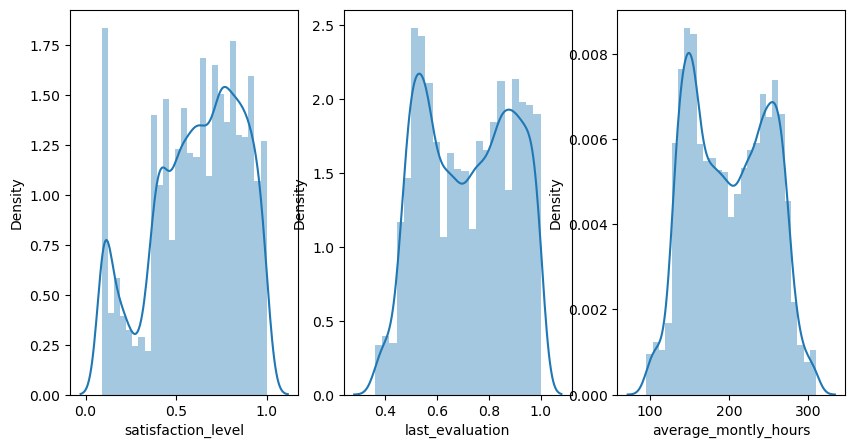

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(10,5))

g = sns.distplot(df['satisfaction_level'],ax=axes[0])
g = sns.distplot(df['last_evaluation'],ax=axes[1])
g = sns.distplot(df['average_montly_hours'],ax=axes[2])

All three distributions showing a bimodial which happens due to a mixuture of two distributions.

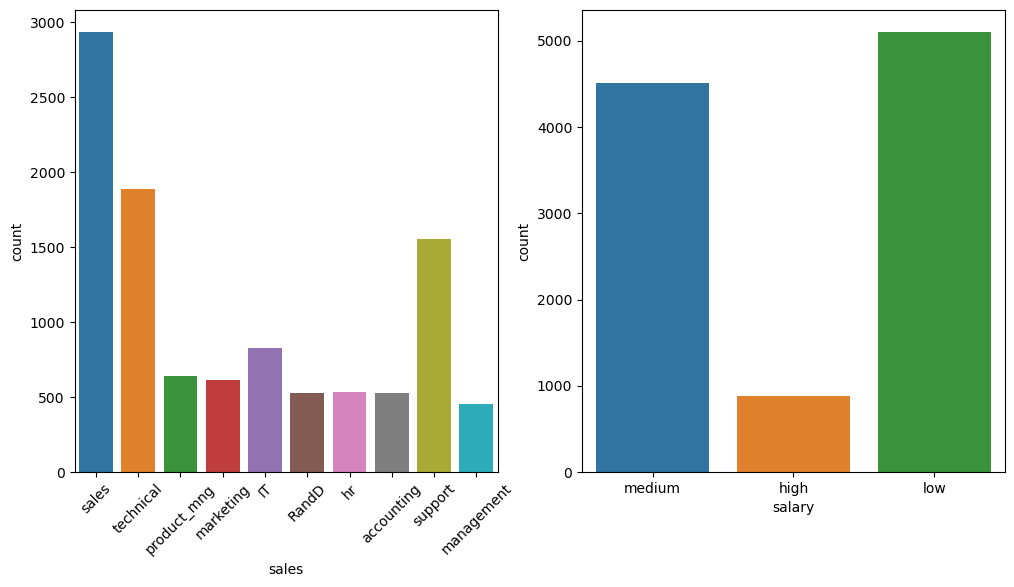

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of categorical columns using count plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Use sns.countplot for plotting categorical variables
g = sns.countplot(data=df, x="sales", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

g = sns.countplot(data=df, x="salary", ax=axes[1])

plt.show()


Text(0, 0.5, 'count')

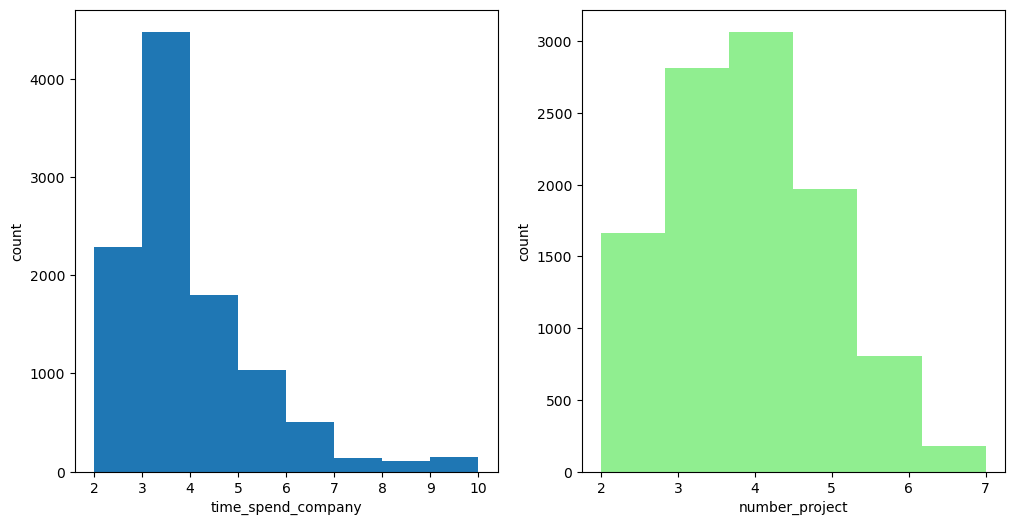

In [16]:
#distirbution of other numerical features
fig, axes = plt.subplots(ncols=2,figsize=(12,6))

g=df['time_spend_company'].plot(kind='hist',ax=axes[0],bins=8)
g.set_xlabel('time_spend_company')
g.set_ylabel('count')

g=df['number_project'].plot(kind='hist',ax=axes[1],bins=6,color='lightgreen')
g.set_xlabel('number_project')
g.set_ylabel('count')

Time spend company seems to be positively skewed with majority of the employees are less than or equal to 3 years

I see a similar distribution in number of projects but less skewed compared to Time spend company

## 6. Bivariate Analysis

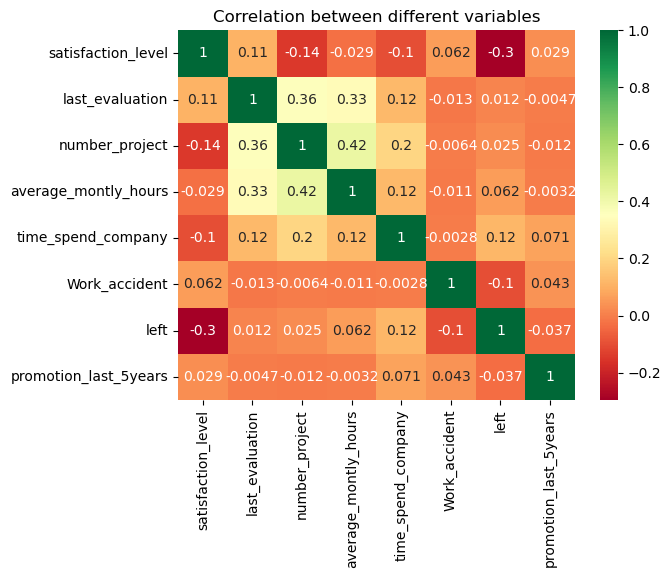

In [20]:
# Drop non-numeric columns or encode them into numeric format
numeric_df = df.select_dtypes(include=['number'])

# Generate the heatmap with the correlation matrix of the numeric DataFrame
g = sns.heatmap(numeric_df.corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation between different variables')
plt.show()


#### Principal Component Analysis other group

In [21]:
# Define the order of categories
salary_categories = ['low', 'medium', 'high']

# Convert the "salary" column to a categorical variable with specified order
df["salary"] = pd.Categorical(df["salary"], categories=salary_categories, ordered=True)

# Encode the categorical variable as codes (numeric)
df["salary"] = df["salary"].cat.codes


In [22]:
#drop the sales categorial non-nominal feature 
df = df.drop(labels=["sales"],axis = 1)

In [23]:
#get a random sample of data for the PCA analysis
df = df.sample(n=10000,replace=True)

In [24]:
# Standardize features by removing the mean and scaling to 
# unit variance
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler

N = StandardScaler()
N.fit(df)
df_norm = N.transform(df)

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [26]:
from sklearn.decomposition import PCA

# Linear dimensionality reduction using Singular Value Decomposition
# of the data to project it to a lower-dimensional space.
pca = PCA(n_components=2)
pca_representation = pca.fit_transform(df_norm)


In [27]:
df_pca = pd.DataFrame(pca_representation)
df_pca.head(5)

,0,1
0,0.100189,0.798840
1,2.442170,0.946359
2,1.165670,0.789350
3,-1.326895,0.653060
4,-1.495319,-2.251200


<Axes: xlabel='0', ylabel='1'>

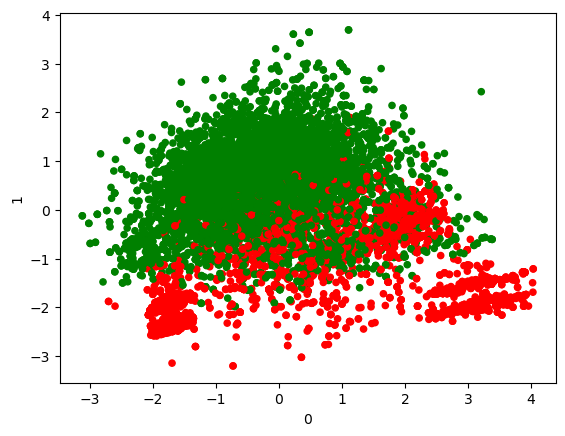

In [28]:
left_colors = df["left"].map(lambda s : "g"  if s==0 else "r")
df_pca.plot(x=0,y=1,kind='scatter', c = left_colors)

#### left with other features

In [29]:
df_stay = df[df["left"]==0]
df_left = df[df["left"]==1]

#### Satisfaction_level

C:\Users\HomePC\AppData\Local\Temp\ipykernel_12320\1282115771.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data=df_stay["last_evaluation"], color='b', shade=True, ax=axes[2])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_12320\1282115771.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(data=df_left["last_evaluation"], color='g', shade=True, ax=axes[2])


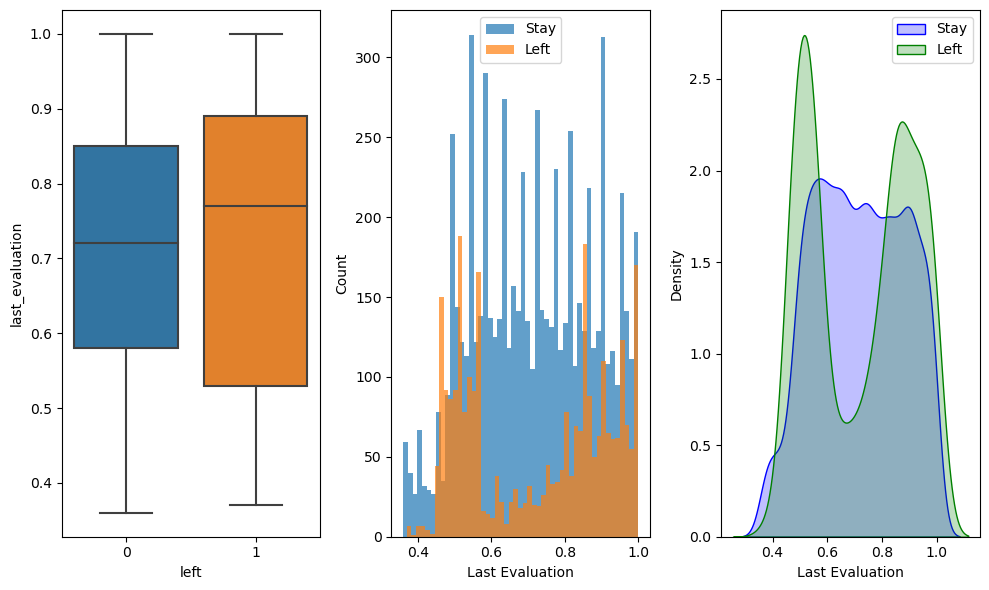

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(10, 6))
sns.boxplot(y="last_evaluation", x="left", data=df, ax=axes[0])
axes[1].hist(df_stay["last_evaluation"], bins=50, label="Stay", alpha=0.7)
axes[1].hist(df_left["last_evaluation"], bins=50, label="Left", alpha=0.7)
axes[1].set_xlabel("Last Evaluation")
axes[1].set_ylabel("Count")
axes[1].legend()

g = sns.kdeplot(data=df_stay["last_evaluation"], color='b', shade=True, ax=axes[2])
g = sns.kdeplot(data=df_left["last_evaluation"], color='g', shade=True, ax=axes[2])
g.legend(["Stay", "Left"])
g.set_xlabel('Last Evaluation')
g.set_ylabel('Density')

plt.tight_layout()
plt.show()
plt.close()


We can see clearly two sub-groups among left employees, one group with low avearge monthly hours and a another with high monthly hours

#### Salary

In [31]:
salary_counts = df.groupby(['left'])['salary'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
salary_counts

,left,salary,percentage
0,0,0,46.215758
1,0,1,44.267156
2,0,2,9.517086
3,1,0,57.265250
4,1,1,39.136395
5,1,2,3.598355


Text(0, 0.5, 'percentage')

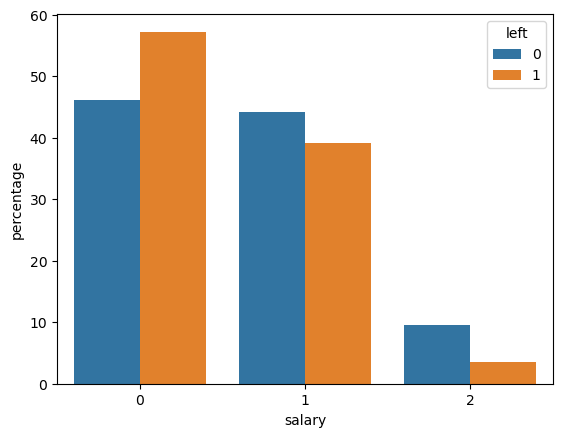

In [32]:
g = sns.barplot(x='salary',y='percentage',data=salary_counts,
            hue='left')
g.set_ylabel('percentage')

We see that there is a higher perecentage of employees left in the low salary group compared to the high salary group.

#### Sales

In [33]:
df = pd.read_csv(r'C:\proj file\hr_train.csv', encoding='unicode_escape')
sales_counts = df.groupby(['left'])['sales'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
sales_counts.head()

,left,sales,percentage
0,0,sales,28.017241
1,0,technical,17.726293
2,0,support,14.857220
3,0,IT,8.054957
4,0,product_mng,6.209591


Text(0, 0.5, 'percentage')

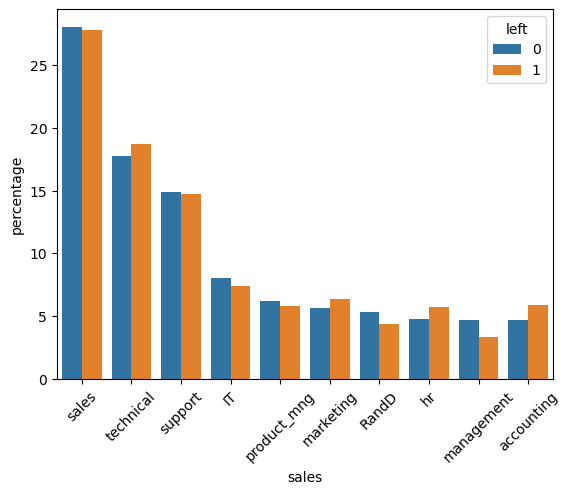

In [34]:
g = sns.barplot(x='sales',y='percentage',data=sales_counts,
            hue='left')
plt.setp(g.get_xticklabels(), rotation=45)
g.set_ylabel('percentage')

I see there are two groups of departments based on the employee turnover

- less than 50% Turnover - IT, Prodcut_mng, RandD,Managment,Sales,Support
- more than 50% Turnover - Technical,Accounting,,Marketing

#### work accident and promotion last 5 years

In [35]:
work_acc_counts = df.groupby(['left'])['Work_accident'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
display(work_acc_counts.head())

promo_counts = df.groupby(['left'])['promotion_last_5years'].value_counts(normalize=True).\
rename('percentage').mul(100).reset_index()
display(promo_counts)


,left,Work_accident,percentage
0,0,0,83.230065
1,0,1,16.769935
2,1,0,91.219512
3,1,1,8.780488


,left,promotion_last_5years,percentage
0,0,0,97.481142
1,0,1,2.518858
2,1,0,98.666667
3,1,1,1.333333


Text(0, 0.5, 'percentage')

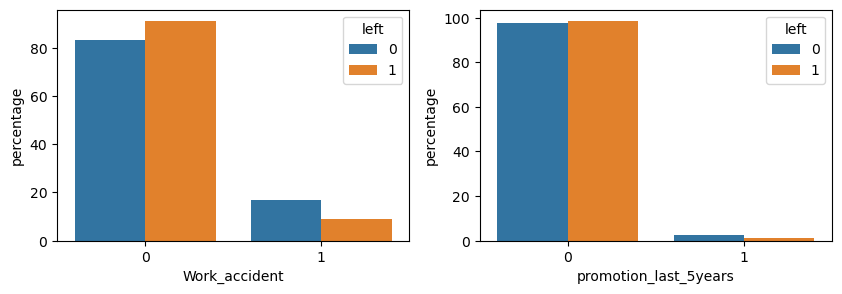

In [36]:
fig, axes = plt.subplots(ncols=2,figsize=(10,3))

g = sns.barplot(x='Work_accident',y='percentage',data=work_acc_counts,
            hue='left',ax=axes[0])
g.set_ylabel('percentage')

g = sns.barplot(x='promotion_last_5years',y='percentage',data=promo_counts,
            hue='left',ax=axes[1])
g.set_ylabel('percentage')

I see here higher percentage of employees had left within the group of employees who had reported a work_accident.
I also see that higher percentage of employees had lef within the group of employees who did not receive a promotion during last 5 years

## 7. Statistical Modeling

I will jump into statistical modelling and check if we can get better accuracy simply by plugging the data set as it ism

In [37]:
df = pd.read_csv(r'C:\proj file\hr_train.csv', encoding='unicode_escape')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   sales                  10499 non-null  object 
 9   salary                 10499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 820.4+ KB


In [39]:
x_train = pd.get_dummies(df.drop(labels='left',axis=1))
y_train = df['left']

## The stupdiest/baseline model

In [40]:
df.left.value_counts(normalize=True).mul(100)

left
0    70.711496
1    29.288504
Name: proportion, dtype: float64

Guessing 0(stay) will yield a correct choice 70.71% of the time. This is the number we need to beat

## logistic regression

In [41]:
X = x_train[['satisfaction_level']]

In [42]:
X.ndim

2

In [43]:
X.shape

(10499, 1)

In [44]:
#import estimator
from sklearn.linear_model import LogisticRegression
#instantiate estimator to crate an estimator object
lr = LogisticRegression()
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [45]:
# use k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(lr,X,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.72809524, 0.71857143, 0.71857143, 0.70619048, 0.71653168])

0.7175920506363574

In [46]:
# use stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
new_scores = cross_val_score(lr,x_train,y_train,cv=5)
display(new_scores)
display(new_scores.mean())

C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.72904762, 0.71380952, 0.73238095, 0.72428571, 0.71653168])

0.723211098255405

Using both the k-fold and stratified k-fold on logistric regression with satisfaction level, I see only a marginal improvement over the baseline model.

I would like to see how the accuracy of the model would fare if i add the last evaluation variable as we saw that clearly there were 3 clusters of employees based on these two variables.

In [47]:
X = x_train[['satisfaction_level','last_evaluation']]

In [48]:
#import estimator
from sklearn.linear_model import LogisticRegression
#instantiate estimator to crate an estimator object
lr = LogisticRegression()
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [49]:
# use k-fold cross validation
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(lr,X,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.73333333, 0.72142857, 0.71904762, 0.70952381, 0.72129586])

0.7209258377004923

In [50]:
# use stratified k-fold cross validation
from sklearn.model_selection import cross_val_score
new_scores = cross_val_score(lr,X,y_train,cv=5)
display(new_scores)
display(new_scores.mean())

array([0.71666667, 0.70666667, 0.73428571, 0.71809524, 0.72510719])

0.7201642959232288

No use

## use a single decision tree

In [51]:
#import estimator
from sklearn.tree import DecisionTreeClassifier
#instantiate estimator to crate an estimator object
DTC = DecisionTreeClassifier(max_depth=3)
#Restricted the depth of the tree to 3 to build a simple tree
#for better interpretability

In [52]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [53]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(DTC,x_train,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.86619048, 0.84952381, 0.86380952, 0.85571429, 0.86183897])

0.8594154132353274

with a max_depth of 3, it gives an accuracy of 85%!

In [54]:
#import estimator
from sklearn.tree import DecisionTreeClassifier
#instantiate estimator to crate an estimator object
DTC = DecisionTreeClassifier(max_depth=4)

#Restricted the depth of the tree to 3 to build a simple tree
#for better interpretability

In [55]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 1234)
new_scores = cross_val_score(DTC,x_train,y_train,cv=kf)
display(new_scores)
display(new_scores.mean())

array([0.88047619, 0.85904762, 0.8752381 , 0.86285714, 0.87184374])

0.8698925565462012

with an additional max_depth of 1, the accuracy increased by 0%

## use a randomforest

In [68]:
x_train.shape

(10499, 20)

In [56]:
x_train.ndim

2

In [57]:
#import estimator
from sklearn.ensemble import RandomForestClassifier
#instantiate estimator to crate an estimator object
rfc = RandomForestClassifier(n_estimators=100)
type(rfc)

sklearn.ensemble._forest.RandomForestClassifier

In [58]:
# use stratified k-fold cross validation
new_scores = cross_val_score(rfc,x_train,y_train,cv=5)
display(new_scores)
display(new_scores.mean())

array([0.87      , 0.85238095, 0.88428571, 0.86809524, 0.87565507])

0.8700833957213184

the random forest gives an accuracy of 85!

In [59]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
rfc.feature_importances_

array([0.26128486, 0.1639433 , 0.13386922, 0.2010428 , 0.13175735,
       0.01284889, 0.00392695, 0.0059579 , 0.00542366, 0.00534521,
       0.00453089, 0.00397831, 0.00545666, 0.00547635, 0.01119776,
       0.00842664, 0.01022206, 0.00679294, 0.01046418, 0.00805407])

In [61]:
feature_names = x_train.columns

In [62]:
feature_names

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

<Axes: ylabel='feature'>

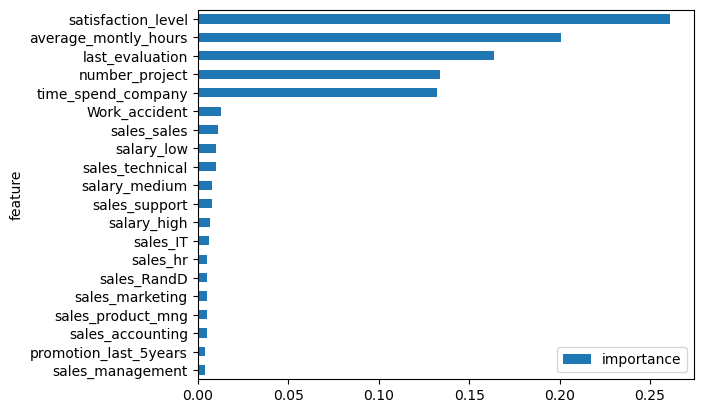

In [63]:
import numpy as np
import pandas as pd

# Assuming rfc is your RandomForestClassifier instance
importances = pd.DataFrame({'feature': x_train.columns, 'importance': np.round(rfc.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=True).set_index('feature')
importances.plot.barh()


### It is clear that the three most important factors for employee retention are satisfaction level, average montly hours and the last evaluation..

In [67]:
x_train.to_csv("C:\\Users\\HomePC\\Nikhil_Jadhav_P4_part2.csv", index=False)

In [69]:
print(x_train.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.42             0.46               2                   150   
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  promotion_last_5years  sales_IT  \
0                   3              0                      0     False   
1                   2              0                      0     False   
2                   3              0                      0     False   
3                   3              1                      0     False   
4                   4              0                      0     False   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \

In [68]:
print(x_train.shape)

(10499, 20)


In [70]:
print(y_train.head())

0    1
1    0
2    0
3    0
4    1
Name: left, dtype: int64


In [71]:
print(y_train.shape)

(10499,)


In [72]:
y_train.to_csv("C:\\Users\\HomePC\\Nikhil_Jadhav_P4_part22.csv", index=False)